In [138]:
import pandas as pd
import numpy as np


### Task1 Data clean, imputation

# 1. in experience, replace >20 to 21; <1 to 1, and convert this as a numerical column
train = pd.read_csv("https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S23/main/classification/data/Assigment/aug_train.csv", delimiter=',')
test = pd.read_csv("https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S23/main/classification/data/Assigment/aug_test.csv", delimiter=',')



In [139]:
# get overview of training data

train.head(10)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,0.624,Male,No relevent experience,no_enrollment,High School,NaN,5,NaN,never,21,0
1,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,>4,12,0
2,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Public Sector,>4,26,0
3,0.624,Male,No relevent experience,Full time course,High School,NaN,1,NaN,never,30,1
4,0.920,Female,Has relevent experience,no_enrollment,Masters,STEM,>20,NaN,>4,46,0
5,0.920,NaN,No relevent experience,no_enrollment,High School,NaN,2,NaN,never,91,0
6,0.855,Male,Has relevent experience,no_enrollment,Masters,STEM,15,Pvt Ltd,never,334,0
7,0.926,Male,No relevent experience,no_enrollment,NaN,NaN,3,NaN,never,47,0
8,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,NaN,1,25,1
9,0.897,NaN,No relevent experience,Full time course,Graduate,STEM,<1,NaN,never,31,1


In [140]:
# get overview of test data
test.head(10)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,0.624,NaN,Has relevent experience,Full time course,Graduate,Other,3,Pvt Ltd,1,134,0
1,0.920,Female,No relevent experience,no_enrollment,Graduate,STEM,5,Early Stage Startup,1,34,1
2,0.767,NaN,Has relevent experience,Full time course,Graduate,STEM,10,Pvt Ltd,2,90,0
3,0.910,Male,No relevent experience,NaN,High School,NaN,10,NaN,never,42,0
4,0.624,Male,Has relevent experience,Part time course,Graduate,STEM,3,Pvt Ltd,1,198,0
5,0.884,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,Funded Startup,1,180,0
6,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,>4,62,0
7,0.691,NaN,No relevent experience,Full time course,Graduate,STEM,2,NaN,1,310,0
8,0.897,NaN,No relevent experience,NaN,NaN,NaN,2,NaN,1,63,0
9,0.939,NaN,No relevent experience,no_enrollment,Masters,STEM,8,Pvt Ltd,>4,130,1


### Task1 Data clean, imputation

In [141]:
#  1. in experience, replace >20 to 21; <1 to 1, and convert this as a numerical column
train['experience'] = train['experience'].replace({'>20': 21, '<1': 1}).astype(float)

# (applying all the same operations for test data)
test['experience'] = test['experience'].replace({'>20': 21, '<1': 1}).astype(float)

In [142]:
# 2. in last_new_job, replace >4 to 5; never to 0, and convert this as a numerical column

train['last_new_job'] = train['last_new_job'].replace({'>4': 5, 'never': 0}).astype(float)
test['last_new_job'] = test['last_new_job'].replace({'>4': 5, 'never': 0}).astype(float)

In [143]:
# 3. If the column is categorical, impute the missing value as its mode. If the column is numerical, impute the missing value as its median

def clean_columnData(df):   
    for column in df.select_dtypes(include=[np.number]).columns:
        median_value = df[column].median()
        replaced = df[column].fillna(median_value)
        df[column] = replaced

    for column in df.select_dtypes(exclude=[np.number]).columns:
        if (df[column].isnull().sum() > 0):
            replaced = df[column].fillna(df[column].mode()[0])
            df[column] = replaced

clean_columnData(train)
clean_columnData(test)

In [144]:
### Task2 Classification

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Build a classification model from the training set ( you can use any algorithms)

# transform columns as preparation for model usage
label_encoders = {}
for column in train.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    train[column] = label_encoders[column].fit_transform(train[column])
    test[column] = label_encoders[column].transform(test[column])

# drop output info/map output info 
X_train = train.drop(columns=['target'])
y_train = train['target']
X_test = test.drop(columns=['target'])
y_test = test['target']

# standardize values for better data handling and use model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Actual use of model
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=1)

In [145]:
# 2. generate the confusion matrix and calculate the accuracy, precision, recall, and F1-score on training set.

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_train_pred = model.predict(X_train)
print(y_train_pred)
y_train_pred = np.round(y_train_pred).astype(int)

train_cmatrix = confusion_matrix(y_train, y_train_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("Results on Training Set:")
print("Confusion Matrix:\n", train_cmatrix)
print("Accuracy: {}".format(train_accuracy))
print("Precision: {}".format(train_precision))
print("Recall: {}".format(train_recall))
print("F1-score: {}".format(train_f1))

[0.11 0.01 0.2  ... 0.09 0.04 0.06]
Results on Training Set:
Confusion Matrix:
 [[1565    0]
 [   2  533]]
Accuracy: 0.9990476190476191
Precision: 1.0
Recall: 0.9962616822429906
F1-score: 0.99812734082397


In [146]:
# 3. Applying the model in the test set and generating the prediction

y_test_pred = model.predict(X_test)
y_test_pred = np.round(y_test_pred).astype(int)

print(y_test_pred)

[1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [147]:
# 4. generate the confusion matrix from the test set and calculate the accuracy, precision, recall, and F1-score

test_cmatrix = confusion_matrix(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Results on Test Set:")
print("Confusion Matrix:\n", test_cmatrix)
print("Accuracy: {}".format(test_accuracy))
print("Precision: {}".format(test_precision))
print("Recall: {}".format(test_recall))
print("F1-score: {}".format(test_f1))

Results on Test Set:
Confusion Matrix:
 [[71  7]
 [16  6]]
Accuracy: 0.77
Precision: 0.46153846153846156
Recall: 0.2727272727272727
F1-score: 0.3428571428571428


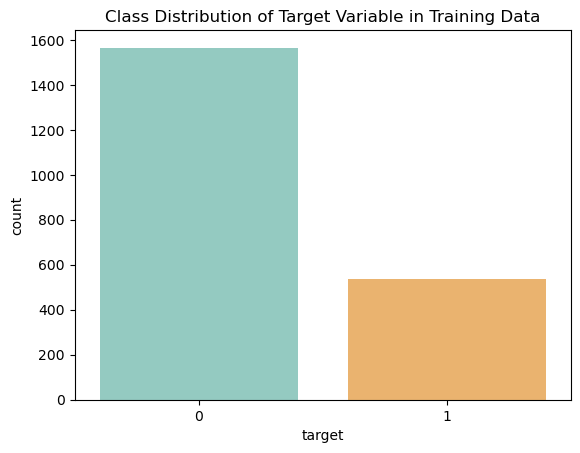

In [148]:
# 5. compare the results between the training and test set

import matplotlib.pyplot as plt
import seaborn as sns

custom_colors = ['#8bd3c7', '#ffb55a']
sns.countplot(x='target', data=train, palette=custom_colors)
plt.title('Class Distribution of Target Variable in Training Data')
plt.show()

# There is a huge difference in performance on training set vs. performance on test set.
# On the training data, the model has: accuracy 99.9%, precision at 100%, recall at 99.6%, and an F1-score at 99.8%. 
# On the test data though, the model has accuracy at 77%, precision at 46%, recall at 27.3%, and an F1-score at 34%. 

# This shows that the model has learned some amount of noise from the training data instead of signal.
# The reasons for overfitting might be:

# The model chosen (Random forest) lends itself to overfitting.
# This is also due to some differences between training and test data, as visualized by the plot.

# There are also issues that could need some preprocessing.
# Features like "enrolled_university", "education_level", "major_discipline", and "company_type" have many different values, 
# leading to a wide variety of categories and high complexity.

In [149]:
# To prevent overfitting, other models could be used or some ensemble of other models even.
# Also it is possible to adjust the hyperparameters or even use Balanced Random Forest Model. 
# using entity embeddings would help, reducing the complexity.

# Other options are tweaking the data sets itself, counterbalancing biases in the data.
# For example oversampling the minority class by using the SMOTE approach (or undersampling the majority class).